In [139]:
import re


with open('onegin.txt', encoding = 'utf-8') as f:
    text = f.read()
    
text_clear = re.sub(r'\[[0-9]*\]', '', text) #почистили текст от примечаний
strings = re.split(r'[A-Z]{2,10}', text_clear)              
t = [re.sub('\n', '', w) for w in ' '.join(strings).split('\n\n') if w!='' 
        and not '……………' in w 
        and not re.findall(r'[A-Z]{2,10}', w)
    and w != '' and w!= ' '] #получили почищенный список всех строк произведения
poem = t[26:] #первые 25 строк - название, эпиграф и т.д
print(poem[:10]) #например, выведем первые 10 строчек в почищенном тексте

['«Мой дядя самых честных правил,', 'Когда не в шутку занемог,', 'Он уважать себя заставил', 'И лучше выдумать не мог.', 'Его пример другим наука;', 'Но, боже мой, какая скука', 'С больным сидеть и день и ночь,', 'Не отходя ни шагу прочь!', 'Какое низкое коварство', 'Полуживого забавлять,']


Теперь попробуем посчитать количество анжамбеманов (посмотрим только на все из них: rejet — «сброс» (конец предложения захватывает начало следующего стиха), contre-rejet «наброс» (начало предложения захватывает конец предыдущего стиха  и double-rejet — «двойной бросок» (фраза начинается посреди стиха и кончается посреди следующего))

In [196]:
rejet = []
r = 0
contre_rejet = []
c_r = 0
ordinary = []
o = 0
double_rejet = []
d_r = 0
all_sent = 0
for i in range(len(poem) - 1):
    if re.findall(r'.*?(?:\;|\.| – ).+', poem[i]):
        if re.findall(r'(?:\;|\.|\!|\?)', poem[i][-1]):
            rejet.append(poem[i])
            r += 1
            all_sent += 1
        elif re.findall(r'.*?(?:;|\.| – ).+', poem[i + 1]):
            double_rejet.append(poem[i] + ' ' + poem[i + 1])
            d_r += 1
            all_sent += 1
        elif re.findall(r'(?:;|\.|\!|\?|\:)', poem[i + 1][-1]):
            contre_rejet.append(poem[i] + ' ' + poem[i + 1])
            c_r += 1
            all_sent += 1
    elif re.findall(r'(?:;|\.|\!|\?)', poem[i][-1]):
        ordinary.append(poem[i])
        o += 1
        all_sent += 1

Сравним количество "простых" строк с разными типами анжамбаменов:

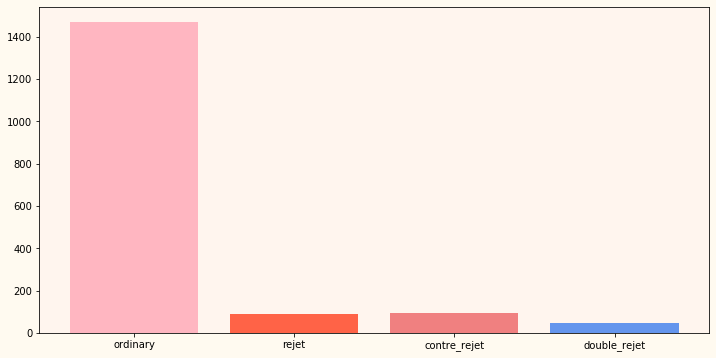

In [200]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = ['ordinary', 'rejet', 'contre_rejet', 'double_rejet']
y = [o, r, c_r, d_r]

fig, ax = plt.subplots()

ax.bar(x, y)
color_rectangle = ['lightpink', 'tomato', 'lightcoral', 'cornflowerblue']
ax.bar(x, y, color = color_rectangle)
ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure

plt.show()

Теперь посмотрии процентное отношение всех разных редложений к строкам, имеющим какую-либо пунктуацию:

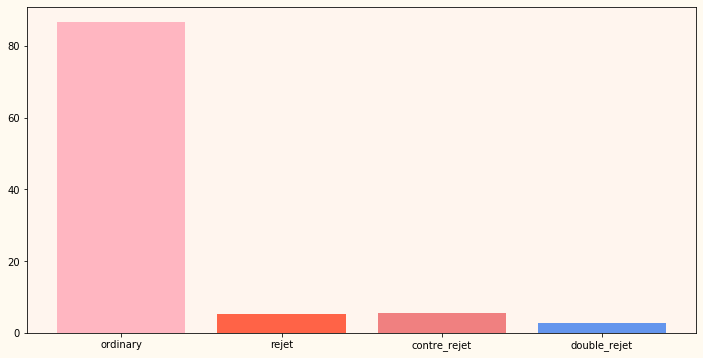

In [199]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = ['ordinary', 'rejet', 'contre_rejet', 'double_rejet']
y = [o / all_sent * 100, r / all_sent * 100, c_r / all_sent * 100, d_r / all_sent * 100]

fig, ax = plt.subplots()

ax.bar(x, y)
color_rectangle = ['lightpink', 'tomato', 'lightcoral', 'cornflowerblue']
ax.bar(x, y, color = color_rectangle)
ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure

plt.show()